This notebook creates a graph showing the rate of application signup for the Terrahacks Hackathon hosted by PACS  
To run this you need the Pandas and Matplotlib Libraries

First I import the needed modules

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

Next I import the Csv containing the data we will be using and store it into a Dataframe

In [22]:
raw = pd.read_csv("user_signup_time.csv")
raw['signup_date'] = pd.to_datetime(raw["signup_date"])
raw

,signup_date
0,2024-06-25 18:57:09.437445-04:00
1,2024-06-25 22:09:45.414858-04:00
2,2024-06-25 22:28:48.742851-04:00
3,2024-06-25 22:30:54.792565-04:00
4,2024-06-25 22:38:23.788281-04:00
...,...
64,2024-06-27 13:52:05.735579-04:00
65,2024-06-27 14:08:00.097556-04:00
66,2024-06-27 14:24:13.015899-04:00
67,2024-06-27 17:37:11.062650-04:00


I already presorted the data in chronologial order before pullin it off Supabase. Therefore I only need to create the graphs

Now to make the first graph.

In [23]:
signups = raw.resample('H', on="signup_date").size().reset_index(name="signup_count")

signups

C:\Users\Kkada\AppData\Local\Temp\ipykernel_24300\871959388.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  signups = raw.resample('H', on="signup_date").size().reset_index(name="signup_count")


,signup_date,signup_count
0,2024-06-25 18:00:00-04:00,1
1,2024-06-25 19:00:00-04:00,0
2,2024-06-25 20:00:00-04:00,0
3,2024-06-25 21:00:00-04:00,0
4,2024-06-25 22:00:00-04:00,7
5,2024-06-25 23:00:00-04:00,7
6,2024-06-26 00:00:00-04:00,1
7,2024-06-26 01:00:00-04:00,2
8,2024-06-26 02:00:00-04:00,2
9,2024-06-26 03:00:00-04:00,0


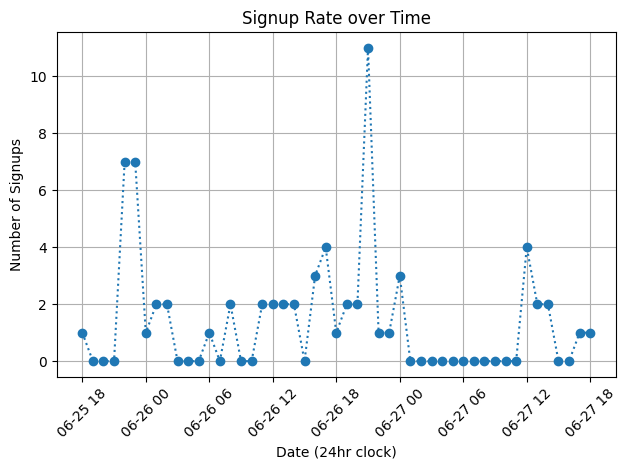

In [24]:
plt.plot(signups["signup_date"], signups["signup_count"], marker= 'o', linestyle = ':')
plt.xlabel("Date (24hr clock)")
plt.ylabel("Number of Signups")
plt.title("Signup Rate over Time")
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

This graph shows the rate of signups over a period of time that the application signups have been open. It seems to have peaked to about 11 signups in one hour on the 26th of June

Now ill create a graph showing the toal amount of signups over time

In [25]:
signup_totals = raw

signup_totals['cumulative_signups'] = range(1, len(signup_totals) + 1)

signup_totals



,signup_date,cumulative_signups
0,2024-06-25 18:57:09.437445-04:00,1
1,2024-06-25 22:09:45.414858-04:00,2
2,2024-06-25 22:28:48.742851-04:00,3
3,2024-06-25 22:30:54.792565-04:00,4
4,2024-06-25 22:38:23.788281-04:00,5
...,...,...
64,2024-06-27 13:52:05.735579-04:00,65
65,2024-06-27 14:08:00.097556-04:00,66
66,2024-06-27 14:24:13.015899-04:00,67
67,2024-06-27 17:37:11.062650-04:00,68


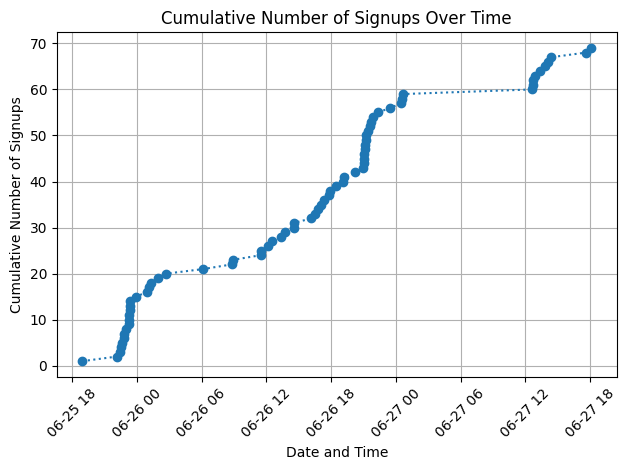

In [33]:
plt.plot(signup_totals["signup_date"],signup_totals["cumulative_signups"], marker='o', linestyle=':')
plt.xlabel('Date and Time')
plt.ylabel('Cumulative Number of Signups')
plt.title('Cumulative Number of Signups Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graph showing number of signups over time with plots

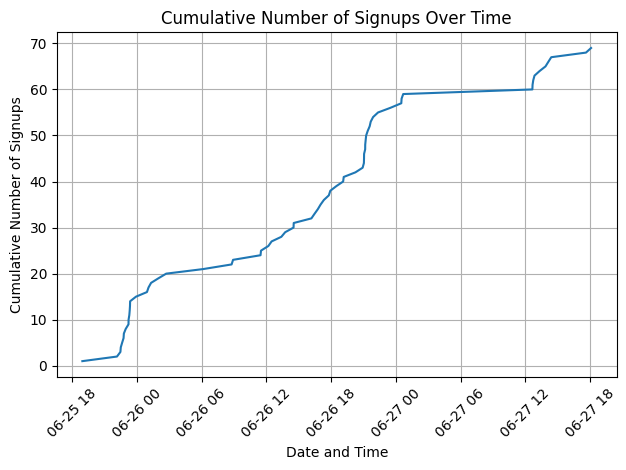

In [31]:
plt.plot(signup_totals["signup_date"],signup_totals["cumulative_signups"],linestyle='-')
plt.xlabel('Date and Time')
plt.ylabel('Cumulative Number of Signups')
plt.title('Cumulative Number of Signups Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graph without plots to more easily visualise